Reverse positive mode
====
Starting from (M,RT) pairs, can we see which transformations are there

In [23]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
from scipy import stats

base_dir = '/Users/simon/git/ms1fun/'
sys.path.append(base_dir + 'code')
sys.path.append(base_dir + 'dbs')

from corr_cluster import Peak,BetaLike,CorrCluster
from formula import Formula
import pylab as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
files = []
prefix = '/Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/Standard_files_Beer_Urine_April2015/Positive_Filtered/csv/'
filename = 'STD_MIX1_60stepped_1E5_Top5'
files.append((prefix,filename,False))
filename = 'STD_MIX2_60stepped_1E5_Top5'
files.append((prefix,filename,False))
filename = 'STD_MIX3_60stepped_1E5_Top5'
files.append((prefix,filename,False))




In [25]:
import transformation
transformations = transformation.load_from_file(base_dir + 'dbs/pos_transformations_camra.yml')
print
print "Loaded " + str(len(transformations)) + " transformations"


sorted_transformations = sorted(transformations,key = lambda x: x.vote,reverse=True)
print
print "Transformation,prob"
for t in sorted_transformations:
    print "{},{:.3f}".format(t.name,t.vote)

Charge Probabilities
+K: 0.200
+2H: 0.200
+H: 0.400
+Na: 0.200

Adduct Probabilities
-CO: 0.091
+CH2O2: 0.091
none: 0.182
+ACN: 0.091
-C2H2: 0.091
-CH2O2: 0.091
+CH3OH: 0.091
-NH3: 0.091
-H2O: 0.091
+NH3: 0.091

Isotope Probabilities
C13: 0.333
mono: 0.417
2C13: 0.250

Multiplicity Probabilities
1: 0.833
2: 0.167

Loaded 150 transformations

Transformation,prob
M+H,0.025
M+H[C13],0.020
M+H[2C13],0.015
M+K,0.013
M+2H,0.013
[M-CO]+H,0.013
[M+CH2O2]+H,0.013
[M+ACN]+H,0.013
[M-C2H2]+H,0.013
[M-CH2O2]+H,0.013
[M+CH3OH]+H,0.013
[M-NH3]+H,0.013
[M-H2O]+H,0.013
[M+NH3]+H,0.013
M+Na,0.013
M+K[C13],0.010
M+2H[C13],0.010
[M-CO]+H[C13],0.010
[M+CH2O2]+H[C13],0.010
[M+ACN]+H[C13],0.010
[M-C2H2]+H[C13],0.010
[M-CH2O2]+H[C13],0.010
[M+CH3OH]+H[C13],0.010
[M-NH3]+H[C13],0.010
[M-H2O]+H[C13],0.010
[M+NH3]+H[C13],0.010
M+Na[C13],0.010
M+K[2C13],0.008
M+2H[2C13],0.008
[M-CO]+H[2C13],0.008
[M+CH2O2]+H[2C13],0.008
[M+ACN]+H[2C13],0.008
[M-C2H2]+H[2C13],0.008
[M-CH2O2]+H[2C13],0.008
[M+CH3OH]+H[2C13],0.008


In [26]:
from databases import Standards
st = Standards()

In [27]:
from voter import ReverseVoter
hits = {}
for thisfile in files:
    csvfile = prefix + thisfile[1] + '.csv'
    peaks = []
    with open(csvfile,'r') as f:
        f.readline()
        for line in f:
            split_line = line.split(',')
            pid = int(split_line[0])
            mass = float(split_line[1])
            rt = float(split_line[2])
            intensity = float(split_line[3])
            peaks.append(Peak(pid,mass,rt,intensity))

    print "Loaded {} peaks".format(len(peaks))
    rv = ReverseVoter(transformations,peaks)

    hits[thisfile] = {}
    for mol in st.mols:
        temp = rv.find_mol(mol,remove_found_peaks=True,verbose=False)
        if len(temp) > 0:
            hits[thisfile][mol] = temp

Loaded 1569 peaks
Loaded 1681 peaks
Loaded 1654 peaks


In [28]:
all_charges = []
charge_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.charge_name in all_charges:
                charge_counts[all_charges.index(t.charge_name)] += 1
            else:
                all_charges.append(t.charge_name)
                charge_counts.append(1)

for i,c in enumerate(all_charges):
    print c,charge_counts[i],'{:.3f}'.format(1.0*charge_counts[i]/sum(charge_counts))

+Na 51 0.172
+H 223 0.751
+2H 6 0.020
+K 17 0.057


In [29]:
all_adducts = []
adduct_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.adducts in all_adducts:
                adduct_counts[all_adducts.index(t.adducts)] += 1
            else:
                all_adducts.append(t.adducts)
                adduct_counts.append(1)
for i,c in enumerate(all_adducts):
    print c,adduct_counts[i],'{:.3f}'.format(1.0*adduct_counts[i]/sum(adduct_counts))

none 219 0.737
-NH3 23 0.077
-CH2O2 20 0.067
+NH3 5 0.017
-CO 5 0.017
-H2O 8 0.027
+CH2O2 6 0.020
+CH3OH 6 0.020
+ACN 2 0.007
-C2H2 3 0.010


In [30]:
all_isotopes = []
isotope_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.isotope in all_isotopes:
                isotope_counts[all_isotopes.index(t.isotope)] += 1
            else:
                all_isotopes.append(t.isotope)
                isotope_counts.append(1)

for i,c in enumerate(all_isotopes):
    print c,isotope_counts[i],'{:.3f}'.format(1.0*isotope_counts[i]/sum(isotope_counts))

mono 209 0.704
C13 75 0.253
2C13 13 0.044


In [34]:
all_multiplicities = []
multiplicity_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            mu = str(t.multiplicity)
            if mu in all_multiplicities:
                multiplicity_counts[all_multiplicities.index(mu)] += 1
            else:
                all_multiplicities.append(mu)
                multiplicity_counts.append(1)

for i,c in enumerate(all_multiplicities):
    print c,multiplicity_counts[i],'{:.3f}'.format(1.0*multiplicity_counts[i]/sum(multiplicity_counts))

1 278 0.936
2 19 0.064


In [35]:
charge_count_dict = {}
for i,c in enumerate(all_charges):
    charge_count_dict[c] = charge_counts[i]
adduct_count_dict = {}
for i,a in enumerate(all_adducts):
    adduct_count_dict[a] = adduct_counts[i]
isotope_count_dict = {}
for i,iso in enumerate(all_isotopes):
    isotope_count_dict[iso] = isotope_counts[i]
multiplicity_count_dict = {}
for i,mu in enumerate(all_multiplicities):
    multiplicity_count_dict[mu] = multiplicity_counts[i]

In [37]:
revised_transformations = transformation.load_from_file(base_dir + 'dbs/pos_transformations_camra.yml',
                                                        charge_counts = charge_count_dict,
                                                        adduct_counts = adduct_count_dict,
                                                        isotope_counts = isotope_count_dict,
                                                        multiplicity_counts = multiplicity_count_dict,
                                                       )

Charge Probabilities
+K: 0.060
+2H: 0.023
+H: 0.745
+Na: 0.172

Adduct Probabilities
-CO: 0.019
+CH2O2: 0.023
none: 0.718
+ACN: 0.010
-C2H2: 0.013
-CH2O2: 0.068
+CH3OH: 0.023
-NH3: 0.078
-H2O: 0.029
+NH3: 0.019

Isotope Probabilities
C13: 0.256
mono: 0.693
2C13: 0.052

Multiplicity Probabilities
1: 0.934
2: 0.066


Urine
===
Load the urine data and do the hmdb analysis with the initial and revised transformations


In [42]:
urinefiles = []
prefix = '/Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/urine/pos/csv/'
filename = 'Urine_37_fullscan1_POS'
urinefiles.append((prefix,filename,False))

bl = BetaLike()
clusterings = {}

for f in urinefiles:

    filename = f[1]
    prefix = f[0]
    print "Running file " + filename
    csvfile = prefix + filename + '.csv'
    matfile = prefix + filename + '.corr.mat'
    signalfile = prefix + filename + '.peakml.signal'
    # Simon is an idiot...remember to change 'correct = True' or 'correct = False' 
    # coc = CorrCluster(bl,csvfile,matfile,signal_file=signalfile,greedy_thresh=0.7,correct=True)
    coc = CorrCluster(bl,csvfile,corr_file=matfile,signal_file=signalfile,greedy_thresh=0.7,correct=f[2],data_type='correlation')
    clusterings[filename] = coc

Running file Urine_37_fullscan1_POS
Loaded 7733 peaks
Reading shape correlations from /Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/urine/pos/csv/Urine_37_fullscan1_POS.corr.mat
Greedy clustering done, resulting in 1237 clusters


Original transformations
==

In [44]:
from voter import Voter,PeakGroup
groups = {}
for f in urinefiles:
    v = Voter(transformations)
    filename = f[1]
    print "Performing voting on file {}".format(filename)
    file_groups = []
    for cluster in clusterings[filename].clusters:
        file_groups += v.make_groups(cluster.members)
    groups[filename] = file_groups

Performing voting on file Urine_37_fullscan1_POS


Urine_37_fullscan1_POS
Number of raw hits (i.e. comparing all peaks): 2806 (36% of peaks)
Number of group hits (i.e. hits on group Ms): 1915 (36% of groups)


/Users/simon/.virtualenvs/ms1fun/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/simon/.virtualenvs/ms1fun/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


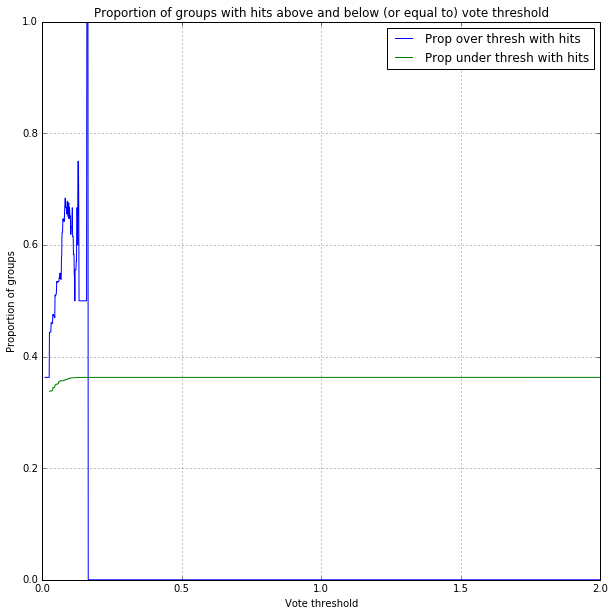

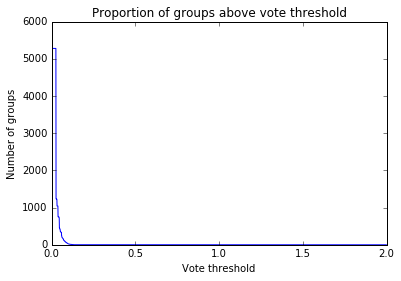

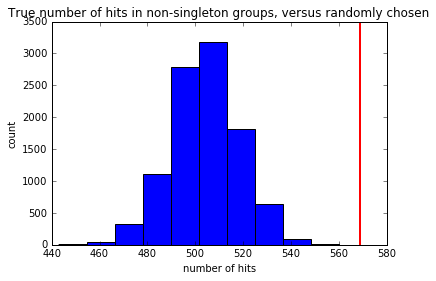

In [46]:
import helper_functions
urine = urinefiles[0][1]
print urine
helper_functions.hmdb_analysis(groups[urine],
                               filename=urine,
                               mtol=10,mode='pos',
                               v_thresh = np.arange(0.01,2.0,0.001))

Revised transformations
==

In [47]:
revised_groups = {}
for f in urinefiles:
    v = Voter(revised_transformations)
    filename = f[1]
    print "Performing voting on file {}".format(filename)
    file_groups = []
    for cluster in clusterings[filename].clusters:
        file_groups += v.make_groups(cluster.members)
    revised_groups[filename] = file_groups

Performing voting on file Urine_37_fullscan1_POS


Urine_37_fullscan1_POS
Number of raw hits (i.e. comparing all peaks): 2806 (36% of peaks)
Number of group hits (i.e. hits on group Ms): 2048 (37% of groups)


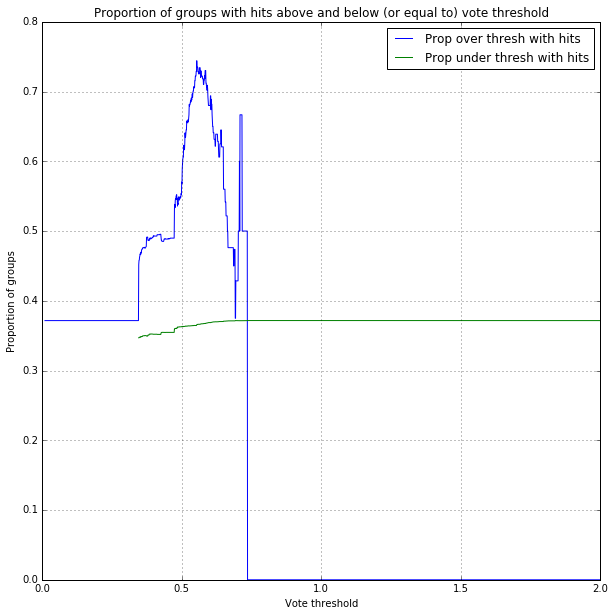

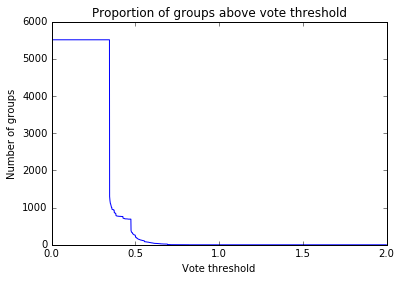

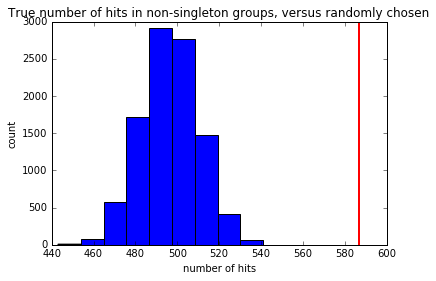

In [48]:
import helper_functions
urine = urinefiles[0][1]
print urine
helper_functions.hmdb_analysis(revised_groups[urine],
                               filename=urine,
                               mtol=10,mode='pos',
                               v_thresh = np.arange(0.01,2.0,0.001))